In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
sns.set_style('whitegrid')

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
pd.__version__

'0.25.3'

In [3]:
df = pd.read_csv('uci-news-aggregator.csv')

In [4]:
df.shape

(422419, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
ID           422419 non-null int64
TITLE        422419 non-null object
URL          422419 non-null object
PUBLISHER    422417 non-null object
CATEGORY     422419 non-null object
STORY        422419 non-null object
HOSTNAME     422419 non-null object
TIMESTAMP    422419 non-null int64
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [6]:
df.isna().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [7]:
df['CATEGORY'].unique()

array(['b', 't', 'e', 'm'], dtype=object)

In [8]:
news_data = df.drop(['ID','URL','PUBLISHER','STORY','HOSTNAME','TIMESTAMP'],axis = 1)

In [9]:
names_replace_dict = {'Business': ['b'],
                 'science and technology':['t'],
                 'Entertainment':['e'],
                'Health':['m'] 
                }

def replace_values(mapping_dict,df,column):
    for i,j in mapping_dict.items():
        df[column].replace(j,i,inplace=True)

replace_values(names_replace_dict,news_data,'CATEGORY')        

In [10]:
news_data.dropna(inplace = True)

In [11]:
news_data.shape

(422419, 2)

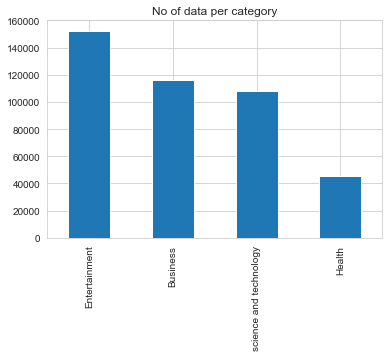

In [12]:
plt.title('No of data per category')
news_data['CATEGORY'].value_counts().plot(kind='bar')

In [13]:
news_data['CATEGORY'].value_counts().describe()

count         4.0000
mean     105604.7500
std       44373.5237
min       45639.0000
25%       92667.7500
50%      112155.5000
75%      125092.5000
max      152469.0000
Name: CATEGORY, dtype: float64

Text(0.5, 0, '')

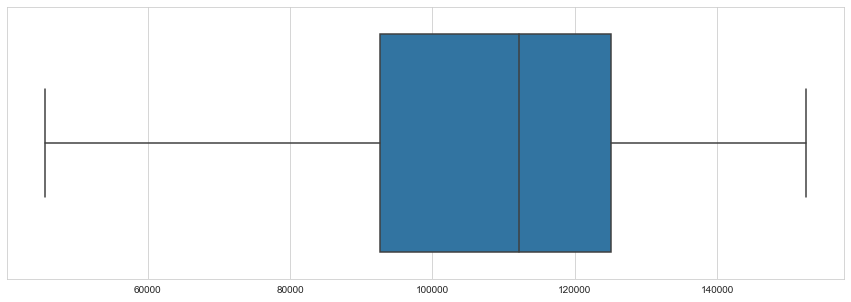

In [14]:
plt.figure(figsize=(15,5))

sns.boxplot(news_data['CATEGORY'].value_counts())
plt.xlabel("")

In [22]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
stop_words = stopwords.words("english")
stem = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
tfidf = TfidfVectorizer(stop_words='english')
def process_text(text):
    text = text.apply(sent_tokenize)
    text = text.apply(lambda x:str(x).lower())
    text = text.apply(lambda x:re.sub('\W'," ",str(x)))
    text = text.apply(lambda x:re.sub('\d'," ",str(x)))
    text = text.apply(lambda x:re.sub('\s+[a-zA-Z]\s+'," ",str(x)))
    text = text.apply(lambda x:re.sub('\s+'," ",str(x)))
    text = text.apply(lambda x:re.sub('^\s'," ",str(x)))
    text = text.apply(lambda x:re.sub('\s$'," ",str(x)))
    text = text.apply(tokenizer.tokenize)
    text = text.apply(lambda x:[stem.stem(w) for w in x])
    text = text.apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in x]))
    return text

In [23]:
process_text(news_data['TITLE'])

0         fed offici say weak data caus by weather shoul...
1         fed charl plosser see high bar for chang in pa...
2         u open stock fall after fed offici hint at acc...
3           fed risk fall behind the curv charl plosser say
4              fed plosser nasti weather ha curb job growth
                                ...                        
422414    surgeon to remov year old rib to rebuild damag...
422415    boy to have surgeri on esophagus after batteri...
422416    child who swallow batteri to have reconstruct ...
422417    phoenix boy undergo surgeri to repair throat d...
422418    phoenix boy undergo surgeri to repair throat d...
Name: TITLE, Length: 422419, dtype: object

In [24]:
news_data['count'] = news_data['TITLE'].apply(lambda x:len(x))

In [33]:
news_data.head()

,TITLE,CATEGORY,count
0,"Fed official says weak data caused by weather,...",Business,68
1,Fed's Charles Plosser sees high bar for change...,Business,66
2,US open: Stocks fall after Fed official hints ...,Business,69
3,"Fed risks falling 'behind the curve', Charles ...",Business,58
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Business,50


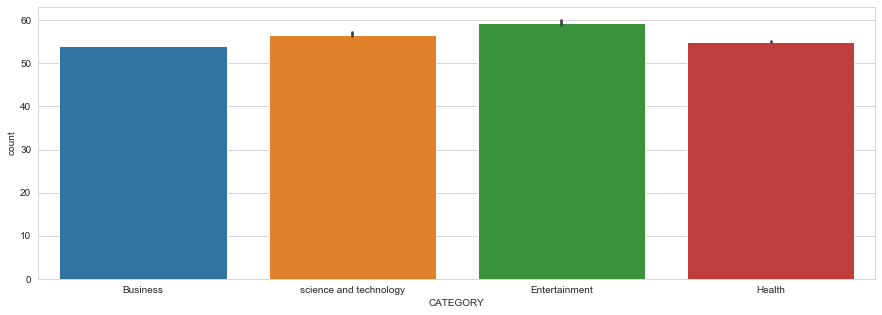

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(news_data['CATEGORY'],news_data['count'],estimator=np.mean)

In [35]:
news_data.shape

(422419, 3)

In [36]:
X = news_data['TITLE']
y = news_data['CATEGORY']

In [37]:
label = LabelEncoder()
y = label.fit_transform(df['CATEGORY'])

# Count Vectorizer

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [40]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
print('Accuracy:',accuracy_score(y_pred, y_test)*100)

Accuracy: 92.72051512712466


In [41]:
from sklearn.ensemble import RandomForestClassifier
rnc = RandomForestClassifier(n_estimators=10,random_state=42)
rnc.fit(X_train,y_train)
y_pred =rnc.predict(X_test)
print('Accuracy:',accuracy_score(y_pred, y_test)*100)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Accuracy: 92.99906885721951


In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_pred, y_test)*100)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 94.65145274055837


# TF-IDF Vectorizer

In [43]:
X = news_data['TITLE']
y = news_data['CATEGORY']

In [44]:
label = LabelEncoder()
y = label.fit_transform(df['CATEGORY'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)

X_test = vectorizer.transform(X_test)


In [47]:
NB = BernoulliNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
print('Accuracy:',accuracy_score(y_pred, y_test)*100)

Accuracy: 92.80715875195304


In [48]:
from sklearn.ensemble import RandomForestClassifier
rnc = RandomForestClassifier(n_estimators=10,random_state=42)
rnc.fit(X_train,y_train)
y_pred =rnc.predict(X_test)
print('Accuracy:',accuracy_score(y_pred, y_test)*100)

Accuracy: 92.9747644524407


In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_pred, y_test)*100)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Khushee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 94.2824676861891


In [ ]:
SVM = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto',class_weight='balanced')
SVM.fit(X_train,y_train)


In [ ]:
y_pred = SVM.predict(X_test)
print('Accuracy:',accuracy_score(y_pred, y_test)*100)

In [ ]:
from bs4 import BeautifulSoup
import requests
url = 'https://www.bbc.com/news'
def url_to_text(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page,'lxml')
    match = soup.find(class_='nw-c-most-read__items')
    headline = [w.text for w in soup.find_all(class_="gs-o-media__body")]
    return headline

headline = url_to_text(url)

In [ ]:
headline = pd.Series(headline)

In [ ]:
headline_df=process_text(headline)

In [ ]:
headline_df = vectorizer.transform(headline_df)

In [ ]:
x = clf.predict(headline_df)

In [ ]:
x

In [ ]:
names_replace_dict = {'b': 'Business',
                     'e':'Entertainment',
                     'm':'Health',
                      't':'Tech'
                }

In [ ]:
def showCategory(headline_array,names_replace_dict,prediction):
    predicted_labels = label.inverse_transform(list(prediction))
    for i in range(0,len(headline_array)-1):
        print(f'{headline_array[i]} : {names_replace_dict[predicted_labels[i]]}')
    

In [ ]:
showCategory(headline,names_replace_dict,x)